<a href="https://colab.research.google.com/github/Haya146/Machine-Learning-Projects/blob/main/CarPrice__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Car Prices with Regression Models

In [1]:
# Step 1: Import essential libraries for analysis and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Step 2: Loading and Preparing the Dataset

In [3]:
# Loading the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Displaying the first few rows of the dataset
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


## Visualization: Distribution of Prices

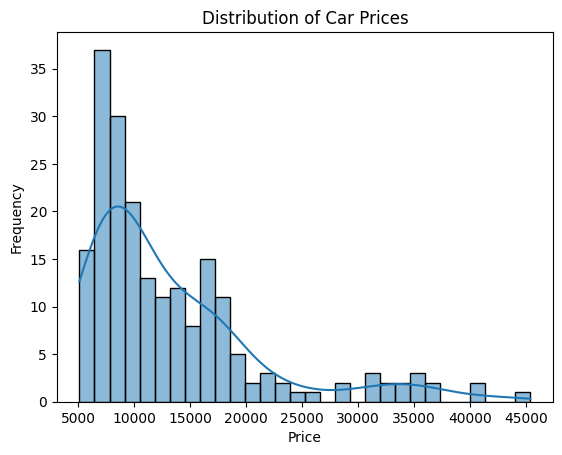

In [4]:
# Histogram + KDE for price distribution
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


## Visualization: Heatmap of Correlation

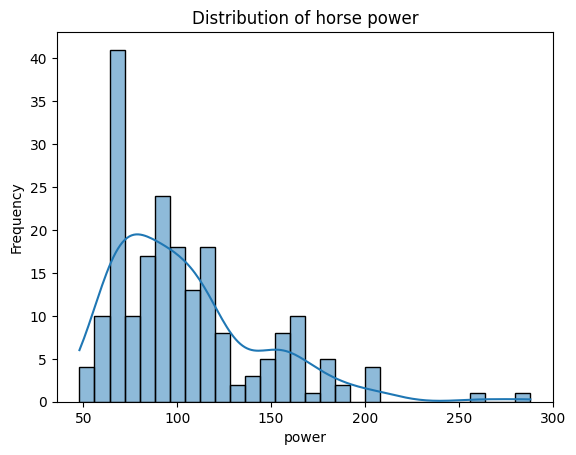

In [5]:
# Histogram + KDE for price distribution
sns.histplot(data=df, x='horsepower', bins=30, kde=True)
plt.title("Distribution of horse power")
plt.xlabel("power")
plt.ylabel("Frequency")
plt.show()

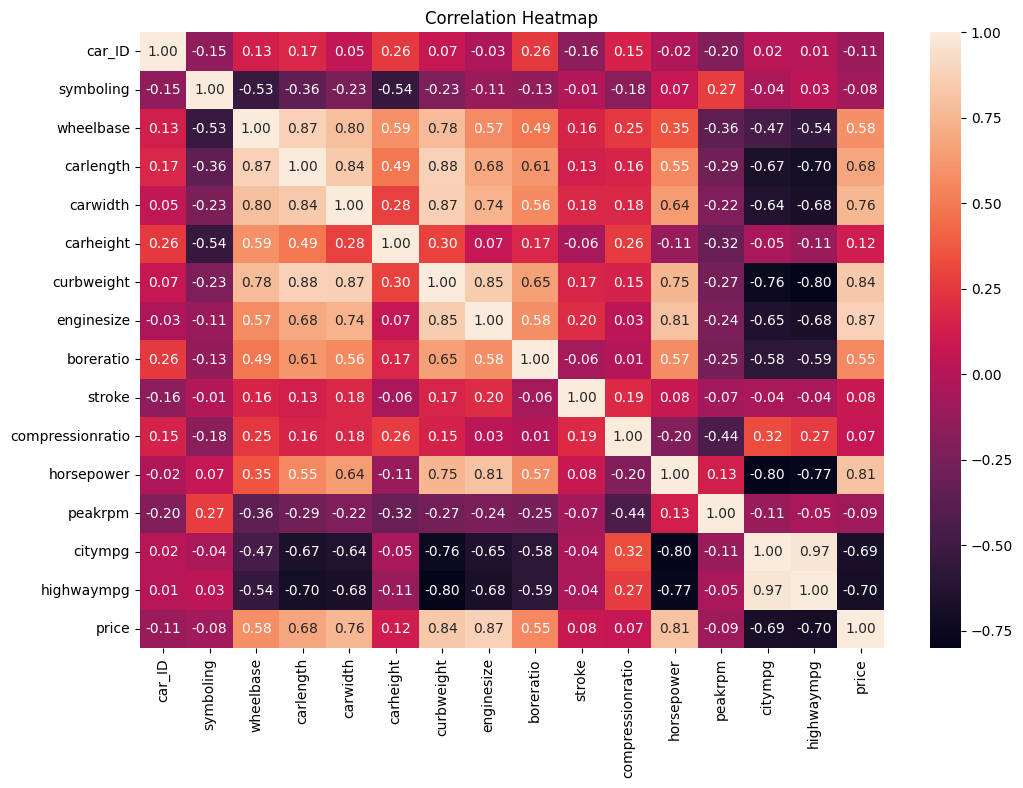

In [29]:
# Heatmap for correlation of numerical features
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select numerical columns only
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Feature Selection

In [30]:
# Selecting features for regression
X = df[['enginesize', 'horsepower', 'citympg', 'highwaympg','wheelbase','boreratio','stroke','compressionratio','peakrpm','curbweight','carheight','carwidth','carlength']] # Feature
y = df['price'] # Target


In [31]:
X

,enginesize,horsepower,citympg,highwaympg,wheelbase,boreratio,stroke,compressionratio,peakrpm,curbweight,carheight,carwidth,carlength
0,130,111,21,27,88.6,3.47,2.68,9.0,5000,2548,48.8,64.1,168.8
1,130,111,21,27,88.6,3.47,2.68,9.0,5000,2548,48.8,64.1,168.8
2,152,154,19,26,94.5,2.68,3.47,9.0,5000,2823,52.4,65.5,171.2
3,109,102,24,30,99.8,3.19,3.40,10.0,5500,2337,54.3,66.2,176.6
4,136,115,18,22,99.4,3.19,3.40,8.0,5500,2824,54.3,66.4,176.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,141,114,23,28,109.1,3.78,3.15,9.5,5400,2952,55.5,68.9,188.8
201,141,160,19,25,109.1,3.78,3.15,8.7,5300,3049,55.5,68.8,188.8
202,173,134,18,23,109.1,3.58,2.87,8.8,5500,3012,55.5,68.9,188.8
203,145,106,26,27,109.1,3.01,3.40,23.0,4800,3217,55.5,68.9,188.8


In [32]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


## Splitting the Dataset

In [33]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training the Linear Regression Model

In [34]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Making Predictions

In [35]:
# Making predictions on the test set
y_pred = model.predict(X_test)


## Evaluating the Model

In [36]:
# Evaluating the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating Root Mean Squared Error
rmse = mse ** 0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 14628664.036287645
Root Mean Squared Error: 3824.743656284385
R-squared: 0.814695731566706


## Visualization: Actual vs Predicted Prices

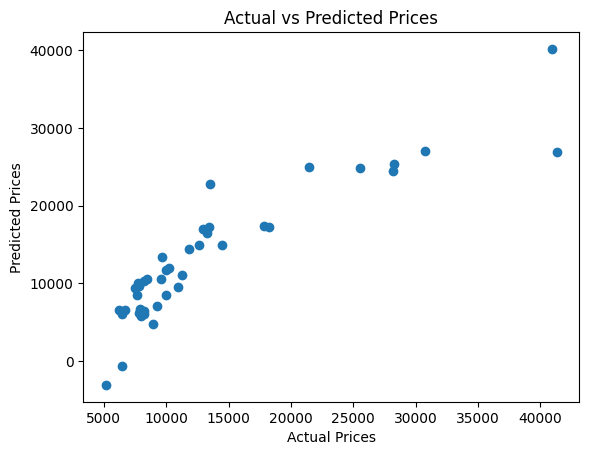

In [37]:
# Scatter plot: Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


## Residual Analysis

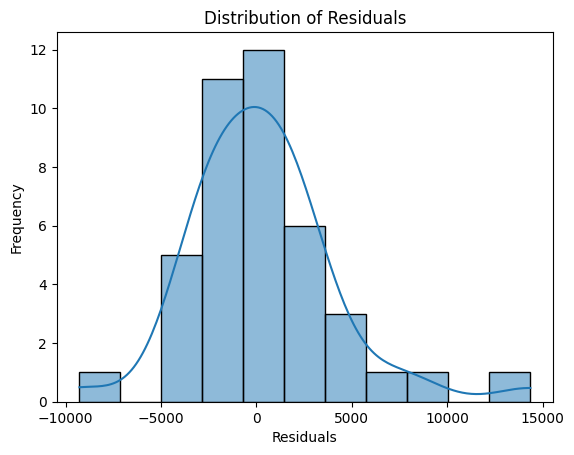

In [38]:
# Distribution of residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


## Testing the Model with New Data

In [44]:
new_data = (150, 120, 25, 30, 100, 3.5, 3.0, 9.0, 5500, 3000, 55, 68, 180)

# Changing input_data to a numpy array
input_data_as_numpay_array= np.asarray(new_data)

# Reshape the array
input_data_reshaped = input_data_as_numpay_array.reshape(1,-1)

# Prediction
prediction = model.predict(input_data_reshaped)
print(prediction)

print('The Car cost is USD',prediction[0])

[18827.87790644]
The Car cost is USD 18827.877906441536


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
